#Data Augmentation with DNN Exercise

##Get standard MNIST dataset

In [1]:
# load the mnist dataset from keras
import keras
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


## Create, compile and fit model with original MNIST data only

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.8974 - accuracy: 0.7213 - val_loss: 0.3011 - val_accuracy: 0.9152
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.9158 - val_loss: 0.2736 - val_accuracy: 0.9225
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9267 - val_loss: 0.2554 - val_accuracy: 0.9270
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9286 - val_loss: 0.2521 - val_accuracy: 0.9286
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2377 - accuracy: 0.9328 - val_loss: 0.2443 - val_accuracy: 0.9310
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2261 - accuracy: 0.9374 - val_loss: 0.2474 - val_accuracy: 0.9289
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2175 - accuracy: 0.9382 - val_loss: 0.2332 - val_accuracy:

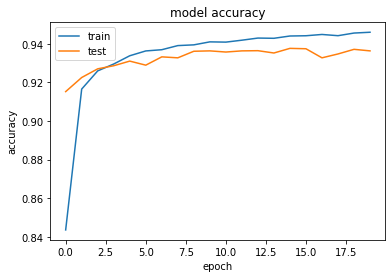

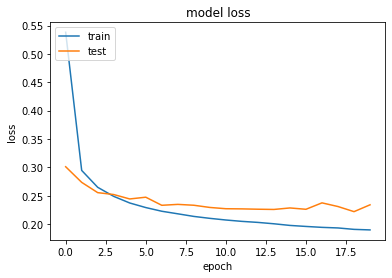

In [2]:
# Create, compile and fit the model with the original MNIST data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##Augment the MNIST dataset with rotated, zoomed, width and height shifts

In [3]:
# use the image data generator from keras to augment the data
from keras.preprocessing.image import ImageDataGenerator
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom


import numpy as np
# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1))
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0])

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


##Create, compile and fit the model with the augmented MNIST data
(this is the same code as used above to create, compile and fit the model)

Compare this accuracy/loss with the accuracy/loss achieved with the original MNIST dataset above

Epoch 1/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.9402 - accuracy: 0.7077 - val_loss: 0.2977 - val_accuracy: 0.9185
Epoch 2/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.5213 - accuracy: 0.8477 - val_loss: 0.2692 - val_accuracy: 0.9248
Epoch 3/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4843 - accuracy: 0.8582 - val_loss: 0.2644 - val_accuracy: 0.9233
Epoch 4/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4660 - accuracy: 0.8636 - val_loss: 0.2582 - val_accuracy: 0.9262
Epoch 5/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4547 - accuracy: 0.8659 - val_loss: 0.2623 - val_accuracy: 0.9205
Epoch 6/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4443 - accuracy: 0.8708 - val_loss: 0.2503 - val_accuracy: 0.9257
Epoch 7/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4350 - accuracy: 0.8724 - val_loss: 0.2502 - val_ac

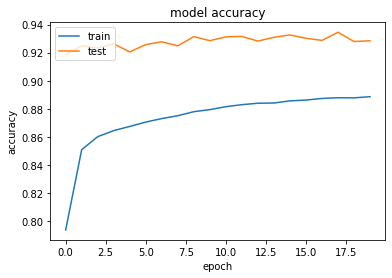

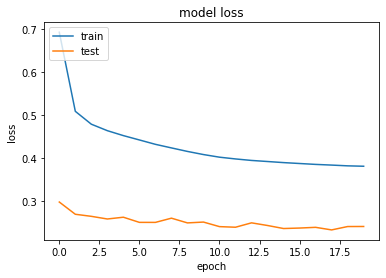

In [4]:
# same as code above to create, compile and fit the model but now using the new augmented data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The validation accuracy may be roughly the same but it was overfitting before and now the validation accuracy is much better than the training accuracy

## Investigate the Keras `ImageDataGenerator` and see what other augmentation you could apply